In [33]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
def get_gt_data(hdf_data_path, gt_key='RT'):
    gt_data = []
    with h5py.File(hdf_data_path,'r') as f:
        for key in f.keys():        
            gt_data.extend(f[key][gt_key][:])
    return gt_data

In [66]:
datasets = ['vicar','vipl','pure','ubfc1','ubfc2']
# datasets = ['vipl']

data_dict = {}
for dataset in datasets:

    hdf_data_path = Path(r"D:\Projects\Waveform\Code\AlternativeRubenCode\waveform_feature_estimation\TrainingDataNormalized\{}\traces_data_gt.h5".format(dataset))

    rt_data = get_gt_data(hdf_data_path, gt_key='AUP')

    data_dict[dataset] = rt_data



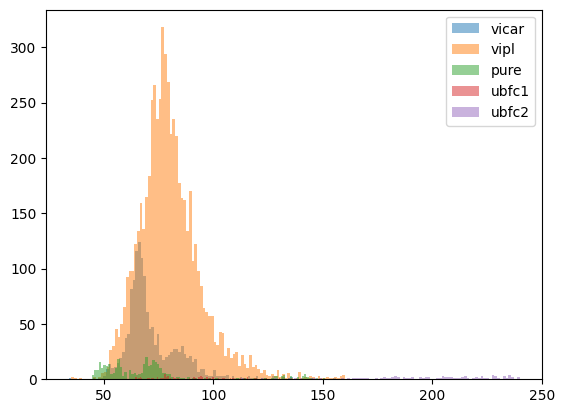

In [59]:
for dataset,rt_data in data_dict.items():    
    plt.hist(rt_data,bins=100,label=dataset,alpha=0.5)
# plt.vlines(149,0,300,colors='r')
# plt.vlines(245,0,300,colors='r')
plt.legend()
plt.show()

In [49]:
from scipy.stats import iqr

Lowerbound: 126.72034626602505
Upperbound: 553.6449404479839


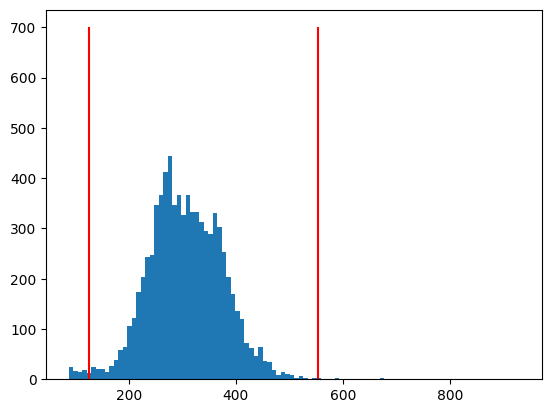

In [67]:
all_rt_data = np.concatenate(list(data_dict.values()))

func = lambda x: np.sqrt(x)
rev_func = lambda x: x**2


std = np.std(func(all_rt_data))
mean = np.mean(func(all_rt_data))
lb = rev_func(mean - 3*std)
ub = rev_func(mean + 3*std)
print(f"Lowerbound: {lb}")
print(f"Upperbound: {ub}")


plt.hist(all_rt_data,bins=100)
plt.vlines(lb,0,700,colors='r')
plt.vlines(ub,0,700,colors='r')
# plt.xlim(300,500)
plt.show()

In [56]:

print(np.median(all_rt_data))

[125.83903552 470.60723514]
304.2663043478261


Lowerbound: 91.19669712355459
Upperbound: 603.513022016033


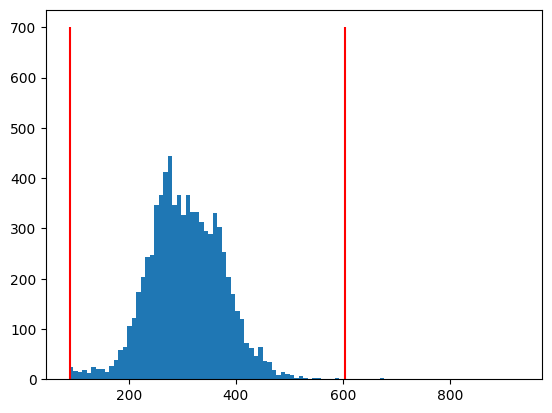

In [68]:

median = np.median(all_rt_data)
lb,ub = np.percentile(all_rt_data,[0.1,99.9])
print(f"Lowerbound: {lb}")
print(f"Upperbound: {ub}")


plt.hist(all_rt_data,bins=100)
plt.vlines(lb,0,700,colors='r')
plt.vlines(ub,0,700,colors='r')
# plt.xlim(300,500)
plt.show()

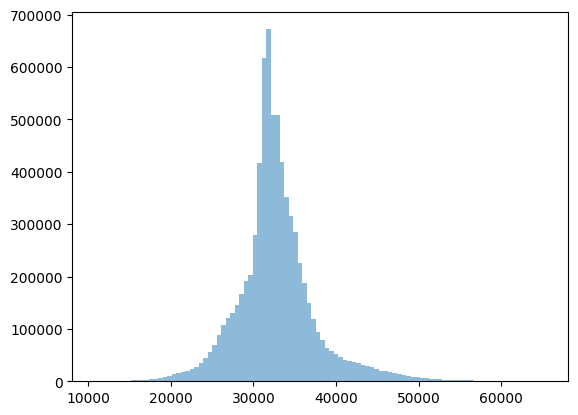

vicar: Min:10818.0 Max:65413.0


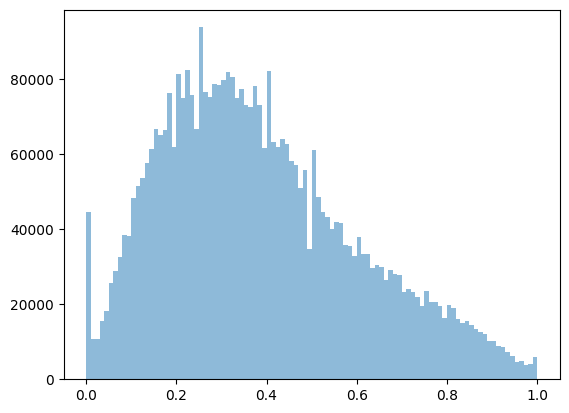

vipl: Min:0.0 Max:1.0


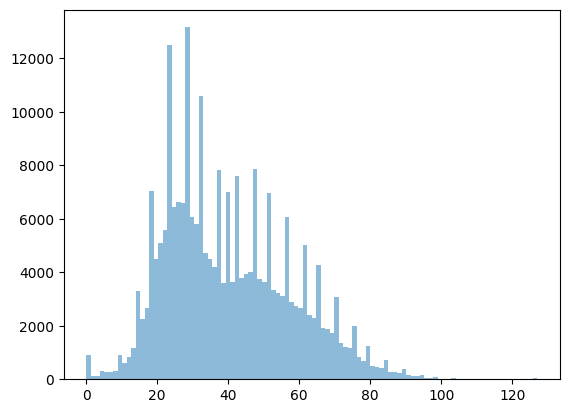

pure: Min:0.0 Max:127.0


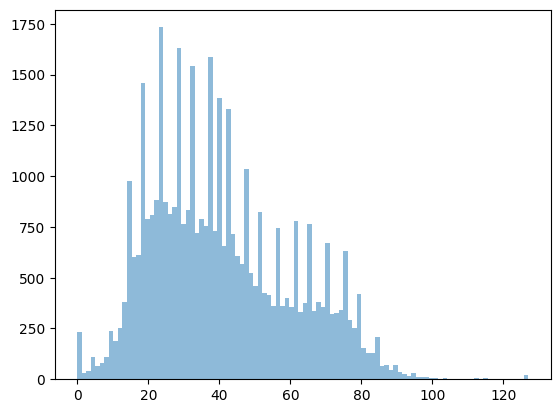

ubfc1: Min:0.0 Max:127.0


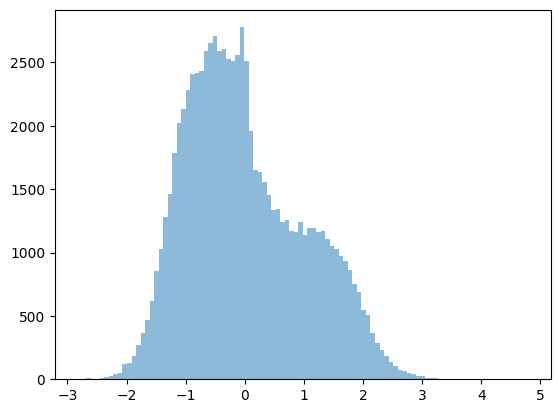

ubfc2: Min:-2.8306109 Max:4.7955921


In [32]:
## Check size of GT data
from omegaconf import OmegaConf
from src.preprocess import load_gt_dict

cfg = OmegaConf.load('x_preprocess_config.yaml')     
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)

data_cfg = OmegaConf.load('x_dataset_config.yaml')
for key in data_cfg.keys():

    sub_data_cfg = data_cfg[key]

    dataset = key
    gt_path = Path(sub_data_cfg.gt_path)
    gt_fps = sub_data_cfg.gt_fps

    gt_sig_dict = load_gt_dict(gt_path,gt_fps,dataset)


    ppg_data = np.concatenate(list(val[1] for val in gt_sig_dict.values()))
    plt.hist(ppg_data,alpha=0.5,bins=100)
    plt.show()
    print(f"{dataset}: Min:{min(ppg_data)} Max:{max(ppg_data)}")

ubfc2: Min:-2.8306109 Max:4.7955921


dict_keys(['vicar', 'vipl', 'pure', 'ubfc1', 'ubfc2'])